In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df20 = pd.read_csv("acidentes2020_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df23 = pd.read_csv("acidentes2023_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df = pd.concat([df20, df23], ignore_index=True)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
print(df20.shape, end=' | ')
print(df23.shape, end=' | ')
print(df.shape)

(348047, 37) | (514799, 37) | (862846, 37)


In [7]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
1,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
2,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
3,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
4,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO


In [8]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [9]:
df.loc[0][0:15]

id                                       260031.0
pesid                                    578475.0
data_inversa                           2020-01-01
dia_semana                           quarta-feira
horario                                  01:00:00
uf                                             TO
br                                          153.0
km                                          678,1
municipio                                  GURUPI
causa_principal                               Sim
causa_acidente                   Animais na Pista
ordem_tipo_acidente                             1
tipo_acidente             Atropelamento de Animal
classificacao_acidente        Com Vítimas Feridas
fase_dia                              Plena Noite
Name: 0, dtype: object

In [10]:
df.loc[0][15:]

sentido_via                              Crescente
condicao_metereologica                     Nublado
tipo_pista                                 Simples
tracado_via                                   Reta
uso_solo                                       Não
id_veiculo                                  464101
tipo_veiculo                             Automóvel
marca                     FIAT/SIENA ATTRACTIV 1.4
ano_fabricacao_veiculo                      2012.0
tipo_envolvido                            Condutor
estado_fisico                        Lesões Graves
idade                                         33.0
sexo                                      Feminino
ilesos                                           0
feridos_leves                                    0
feridos_graves                                   1
mortos                                           0
latitude                              -11,77460203
longitude                             -49,10744996
regional                       

In [11]:
df['causa_principal'].value_counts()

causa_principal
Sim    523270
Não    339576
Name: count, dtype: int64

**Excluindo colunas desnecessarias**

In [12]:
df.drop(['pesid', 'id_veiculo', 'marca', 'regional', 'uop', 'causa_principal'], axis=1, inplace=True)

In [13]:
print(df.shape)

(862846, 31)


**Verificando se há valores nulos**

In [14]:
valores_vazios = df.isna().sum()
valores_vazios[valores_vazios > 0]

br                         2762
km                         2762
tipo_acidente                 1
ano_fabricacao_veiculo    47486
idade                     84078
delegacia                   513
dtype: int64

### **Tratando valores vazios**

Tipo Acidente

In [15]:
df['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                   129263
Saída de leito carroçável          113693
Tombamento                         105500
Queda de ocupante de veículo        99154
Colisão transversal                 71657
Colisão frontal                     59948
Capotamento                         50399
Colisão com objeto                  43379
Colisão lateral mesmo sentido       35369
Colisão lateral                     33319
Colisão com objeto estático         30527
Atropelamento de Pedestre           27663
Engavetamento                       22146
Colisão lateral sentido oposto      14809
Derramamento de carga                7816
Incêndio                             7676
Atropelamento de Animal              6128
Eventos atípicos                     1714
Colisão com objeto em movimento      1504
Danos eventuais                      1181
Name: count, dtype: int64

In [16]:
df.fillna({
    'tipo_acidente' : 'Colisão traseira'
}, inplace=True)

Coluna idade

In [17]:
df['idade'].describe()

count    778768.000000
mean         39.308752
std          39.246982
min           0.000000
25%          27.000000
50%          37.000000
75%          48.000000
max        2022.000000
Name: idade, dtype: float64

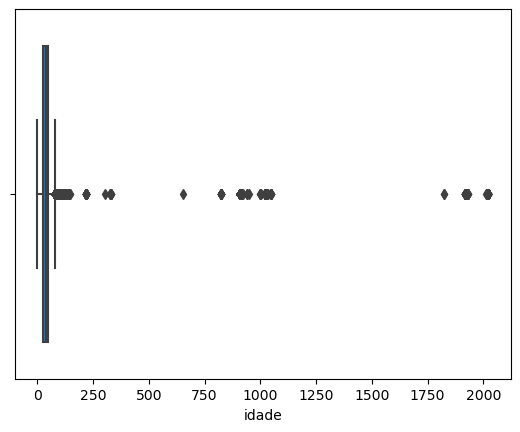

In [18]:
sns.boxplot(x='idade', data=df)
plt.show()

Tratando os outliers da coluna idade

In [19]:
df.loc[df['idade'] > 100, 'idade'] = 37

In [20]:
df['idade'].describe()

count    778768.000000
mean         38.260171
std          15.196067
min           0.000000
25%          27.000000
50%          37.000000
75%          48.000000
max         100.000000
Name: idade, dtype: float64

In [21]:
#Acredito que o valor 0 possa representar recém-nascidos
df.loc[df['idade'] == 0, 'idade'].count()

1078

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


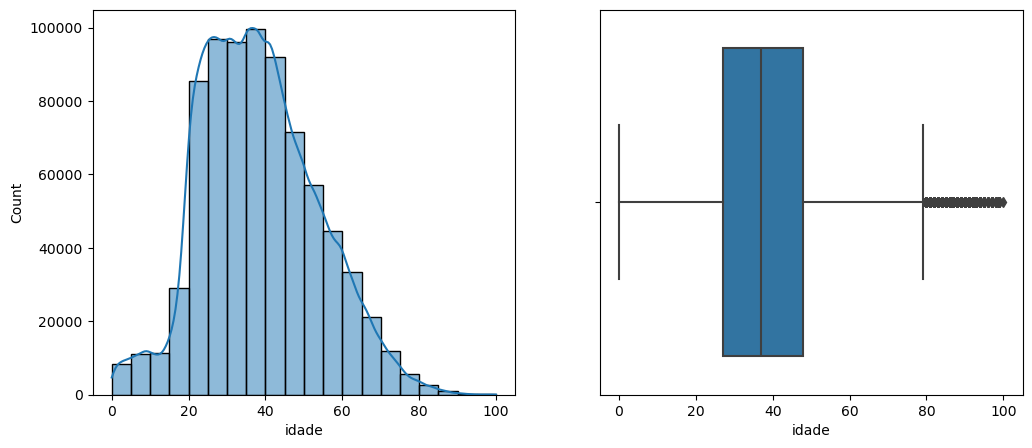

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='idade')
sns.histplot(data=df, x='idade', bins=20, ax=axs[0], kde=True)
plt.show()

In [23]:
media_idade = df['idade'].mean()
desvio_padrao_idade = df['idade'].std()

valores_aleatorios = np.random.normal(media_idade, desvio_padrao_idade, df['idade'].isnull().sum()).astype(int)
while (valores_aleatorios <= 0).any():
    valores_aleatorios[valores_aleatorios <= 0] = np.random.normal(media_idade, desvio_padrao_idade, (valores_aleatorios <= 0).sum()).astype(int)

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


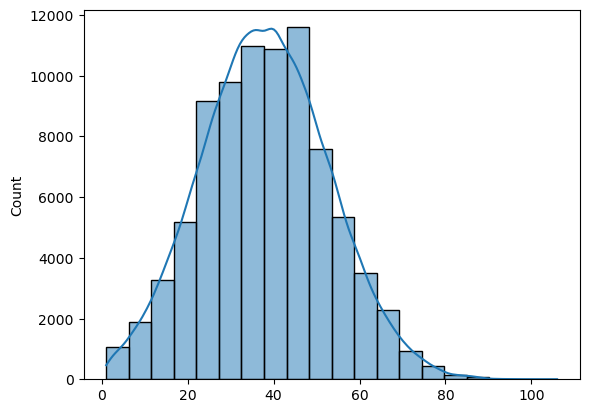

In [24]:
sns.histplot(valores_aleatorios, bins=20, kde=True)
plt.show()

In [25]:
df.loc[df['idade'].isnull(), 'idade'] = valores_aleatorios

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


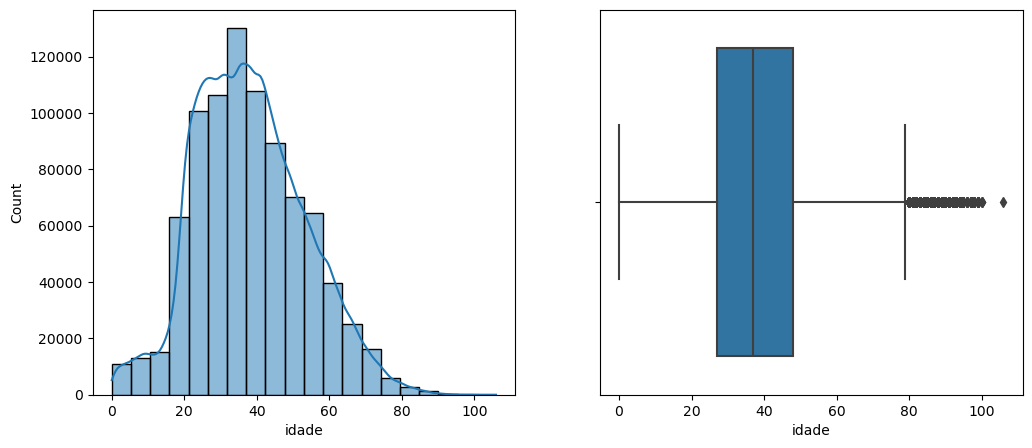

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='idade')
sns.histplot(data=df, x='idade', bins=20, ax=axs[0], kde=True)
plt.show()

In [122]:
df['idade'] = df['idade'].astype(int)

**Coluna BR**

In [27]:
df.loc[df['br'].isna(), ['br', 'municipio']]

,br,municipio
559,NaN,SABARA
4491,NaN,RIO DE JANEIRO
4492,NaN,RIO DE JANEIRO
4493,NaN,RIO DE JANEIRO
6402,NaN,SANTO ANTONIO DO LEVERGER
...,...,...
858496,NaN,ELDORADO DO SUL
858497,NaN,ELDORADO DO SUL
858498,NaN,ELDORADO DO SUL
858499,NaN,ELDORADO DO SUL


In [28]:
def modo_especial(x):
    moda = x.mode()
    if len(moda) > 0:
        return moda.iloc[0]
    else:
        return None

In [29]:
moda_br_municipio = df.groupby('municipio')['br'].agg(modo_especial)
moda_br_municipio

municipio
ABADIA DE GOIAS     60.0
ABADIANIA           60.0
ABARE              116.0
ABEL FIGUEIREDO    222.0
ABRE CAMPO         262.0
                   ...  
XAPURI             317.0
XAXIM              282.0
XEXEU              101.0
XINGUARA           155.0
ZE DOCA            316.0
Name: br, Length: 1903, dtype: float64

In [30]:
df['br'].value_counts()

br
116.0    125973
101.0    112172
40.0      43635
381.0     42644
364.0     34756
          ...  
484.0         6
437.0         6
265.0         5
342.0         2
477.0         2
Name: count, Length: 121, dtype: int64

In [31]:
df['br'] = df.apply(lambda row: moda_br_municipio[row['municipio']] if pd.isna(row['br']) else row['br'], axis=1)

In [32]:
df.loc[df['br'].isna(), 'municipio'].unique()

array(['GALIA', 'SAO JOAO DO PIAUI', 'ARAPIRACA', 'FRANCO DA ROCHA',
       'GARRAFAO DO NORTE', 'SANTANA', 'FARROUPILHA', 'AMETISTA DO SUL',
       'TRAMANDAI', 'PORTO NACIONAL', 'SAO FELIX DO XINGU'], dtype=object)

In [33]:
municipios_br_comNaN = {
    'GALIA': '153',
    'SAO JOAO DO PIAUI': '230',
    'ARAPIRACA': '316',
    'FRANCO DA ROCHA': '116',
    'GARRAFAO DO NORTE': '010',
    'SANTANA': '156',
    'FARROUPILHA': '116',
    'AMETISTA DO SUL': '386',
    'TRAMANDAI': '101',
    'PORTO NACIONAL': '153',
    'SAO FELIX DO XINGU': '155'
}

In [34]:
df['br'] = df.apply(lambda row: municipios_br_comNaN.get(row['municipio'], row['br']), axis=1)

In [35]:
df['br'].isna().sum()

0

**Coluna KM**

In [36]:
df['km'].value_counts()

km
3        3365
5        3158
2        3142
1        3067
4        2422
         ... 
829,9       1
906,9       1
941,3       1
752,8       1
757,7       1
Name: count, Length: 8765, dtype: int64

In [37]:
df['km'] = df['km'].str.split(',').str[0]

In [38]:
quantidade = df['km'].isna().sum()
quantidade

2762

In [39]:
numeros_possiveis = np.arange(1, 101)

probabilidades = [0.05] * 10 + [0.95 / 90] * 90

probabilidades /= np.sum(probabilidades)

numeros_aleatorios = np.random.choice(numeros_possiveis, size=quantidade, p=probabilidades)

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

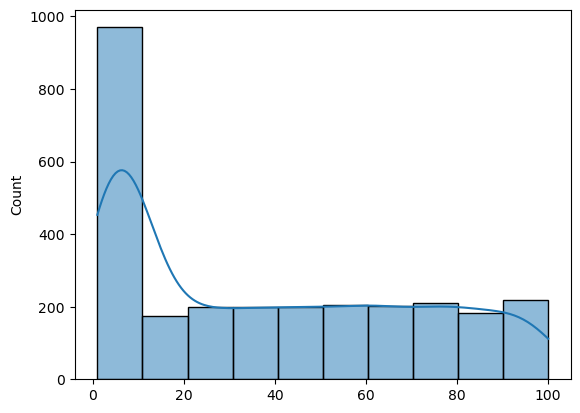

In [40]:
sns.histplot(data=numeros_aleatorios, bins=10, kde=True)

In [41]:
df.loc[df['km'].isnull(), 'km'] = numeros_aleatorios

Ano de Fabricação

In [42]:
df['ano_fabricacao_veiculo'].describe()

count    815360.000000
mean       1924.087406
std         410.051911
min           0.000000
25%        2007.000000
50%        2012.000000
75%        2017.000000
max        2023.000000
Name: ano_fabricacao_veiculo, dtype: float64

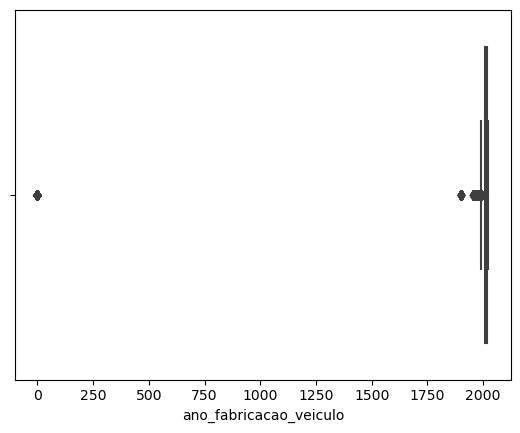

In [43]:
sns.boxplot(data=df, x='ano_fabricacao_veiculo')
plt.show()

Há presença de valores nulos, vazios e menores que 1900

In [44]:
df.loc[df['ano_fabricacao_veiculo'] <= 1950, 'ano_fabricacao_veiculo'].value_counts()

ano_fabricacao_veiculo
0.0       35411
1900.0       62
Name: count, dtype: int64

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


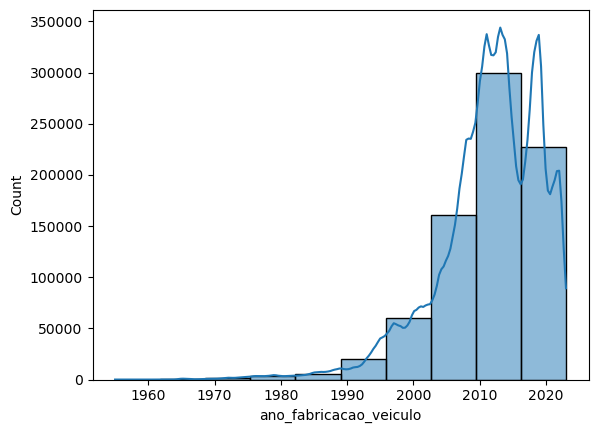

In [45]:
antes = sns.histplot(data=df.loc[df['ano_fabricacao_veiculo'] >= 1950], x='ano_fabricacao_veiculo', bins=10, kde=True)
plt.show(antes)

In [46]:
# Para os valores NaN
total_valores = df['ano_fabricacao_veiculo'].isnull().sum()

num_valores_intervalo_1 = int(total_valores * 0.8)
num_valores_intervalo_2 = int(total_valores * 0.035)
num_valores_outros = total_valores - num_valores_intervalo_1 - num_valores_intervalo_2

valores_intervalo_1 = np.random.randint(2000, 2022, num_valores_intervalo_1)

valores_intervalo_2 = np.random.randint(2022, 2024, num_valores_intervalo_2)

valores_outros = np.random.randint(1980, 2022, num_valores_outros)
anos_aleatorios = np.concatenate((valores_intervalo_1, valores_intervalo_2, valores_outros))

np.random.shuffle(anos_aleatorios)

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


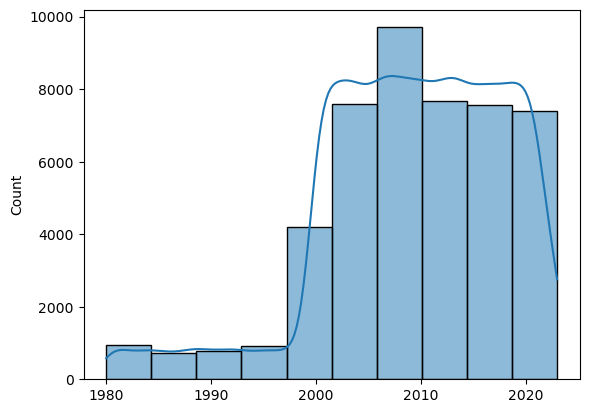

In [47]:
sns.histplot(data=anos_aleatorios, bins=10, kde=True)
plt.show()

In [48]:
df.loc[df['ano_fabricacao_veiculo'].isna(), 'ano_fabricacao_veiculo'] = anos_aleatorios

In [49]:
df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].astype(int)

In [50]:
valores_zero = df.loc[df['ano_fabricacao_veiculo'] <= 1950].shape[0]

# Calcular o número de valores para cada intervalo, colocando maiores probabilidades para valores entre 2000 a 2022
num_valores_intervalo_1 = int(valores_zero * 0.8)
num_valores_intervalo_2 = int(valores_zero * 0.035)
num_valores_outros = valores_zero - num_valores_intervalo_1 - num_valores_intervalo_2

# Gerar valores aleatórios para cada intervalo
valores_intervalo_1 = np.random.randint(2000, 2022, num_valores_intervalo_1)
valores_intervalo_2 = np.random.randint(2022, 2024, num_valores_intervalo_2)
valores_outros = np.random.randint(1980, 2022, num_valores_outros)

anos0_aleatorios = np.concatenate((valores_intervalo_1, valores_intervalo_2, valores_outros))

np.random.shuffle(anos0_aleatorios)

In [51]:
df.loc[df['ano_fabricacao_veiculo'] <= 1950, 'ano_fabricacao_veiculo'] = anos0_aleatorios

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


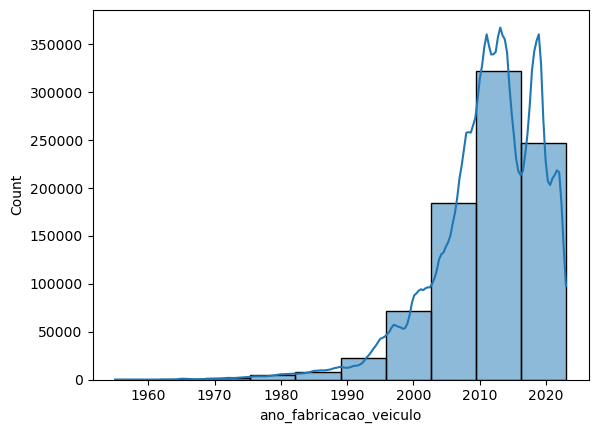

In [52]:
sns.histplot(data=df, bins=10, kde=True, x='ano_fabricacao_veiculo')
plt.show()

Delegacia

In [53]:
moda_delagacia_municipio = df.groupby('municipio')['delegacia'].agg(modo_especial)
moda_delagacia_uf = df.groupby('uf')['delegacia'].agg(modo_especial)

In [54]:
df['delegacia'] = df.apply(lambda row: moda_delagacia_municipio[row['municipio']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)
df['delegacia'] = df.apply(lambda row: moda_delagacia_uf[row['uf']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)

Foi observado anteriormente tipos de dados incorretos

In [55]:
df.dtypes[:20]

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                         object
km                         object
municipio                  object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo      int32
dtype: object

In [56]:
df.dtypes[20:]

tipo_envolvido     object
estado_fisico      object
idade             float64
sexo               object
ilesos              int64
feridos_leves       int64
feridos_graves      int64
mortos              int64
latitude           object
longitude          object
delegacia          object
dtype: object

O tipo object significa que há dois ou mais tipos de dados misturados

***Formatando os tipos de dados***

In [57]:
df['id'].value_counts()

id
513470.0    1512
508740.0     990
543737.0     900
502263.0     880
563408.0     816
            ... 
549178.0       1
549177.0       1
549175.0       1
265422.0       1
284383.0       1
Name: count, Length: 131310, dtype: int64

In [58]:
df['id'] = df['id'].astype(str)
df['id'] = df['id'].str.replace('.0', '')

In [59]:
df = df.drop_duplicates(subset=['id', 'idade'])

In [60]:
df['id'].value_counts()

id
508740    73
568579    73
324704    65
533378    65
546125    63
          ..
308203     1
533685     1
308193     1
533694     1
266796     1
Name: count, Length: 131310, dtype: int64

In [61]:
df['data_inversa'].value_counts()

data_inversa
2023-12-23    1040
2023-06-11     911
2023-07-23     896
2020-10-10     855
2023-12-22     849
              ... 
2020-03-27     208
2020-03-30     195
2020-03-25     178
2020-03-26     175
2020-03-23     165
Name: count, Length: 731, dtype: int64

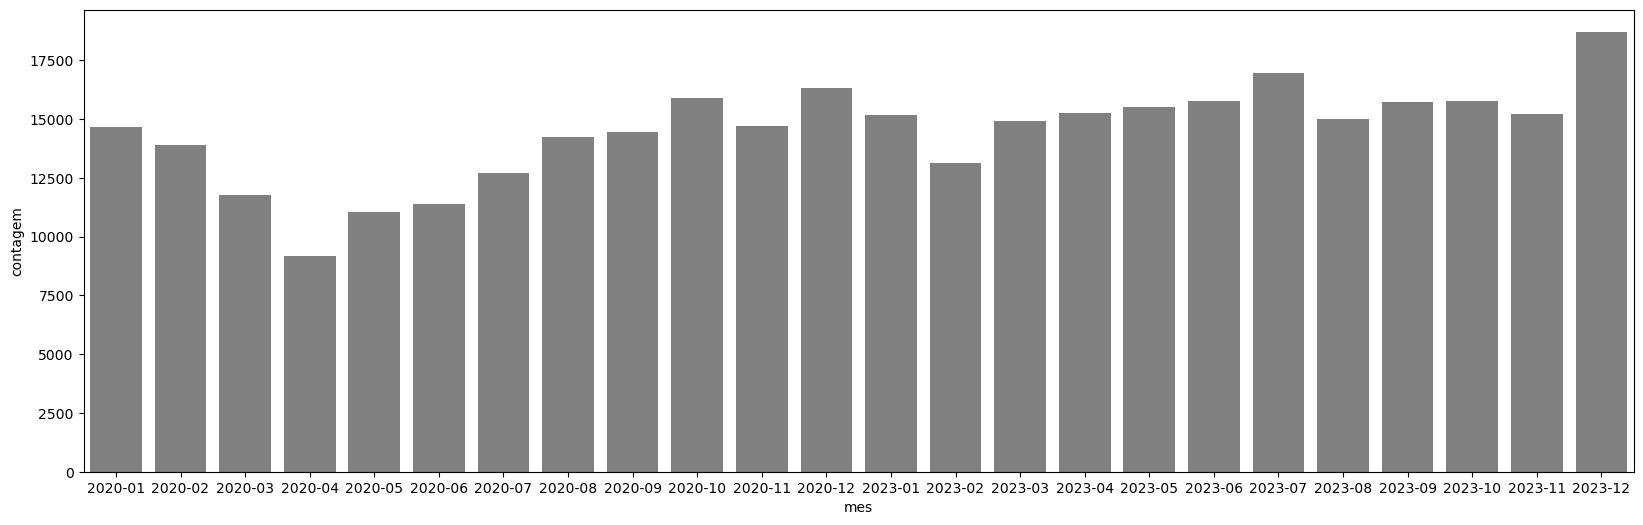

In [62]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

df['mes'] = df['data_inversa'].dt.to_period('M')

contagem_meses = df.groupby('mes').size().reset_index(name='contagem')

plt.figure(figsize=(20, 6))
sns.barplot(x='mes', y='contagem', data=contagem_meses, color='gray')
plt.show()

In [63]:
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S')

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


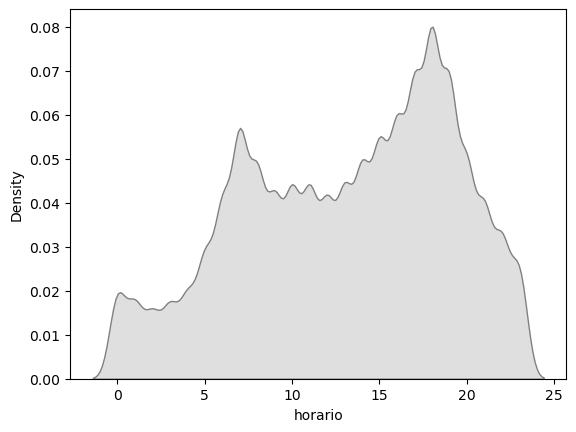

In [64]:
sns.kdeplot(df['horario'].dt.hour, fill=True, color='gray')

plt.show()

In [65]:
df['horario'].value_counts()

horario
1900-01-01 19:00:00    5145
1900-01-01 18:30:00    5026
1900-01-01 18:00:00    4963
1900-01-01 17:00:00    4183
1900-01-01 20:00:00    3893
                       ... 
1900-01-01 03:29:00       1
1900-01-01 01:31:00       1
1900-01-01 01:47:00       1
1900-01-01 02:56:00       1
1900-01-01 01:19:00       1
Name: count, Length: 1424, dtype: int64

In [66]:
df['data_completa'] = df['data_inversa'] + pd.to_timedelta(df['horario'].dt.strftime('%H:%M:%S'))
df['data_completa'].value_counts()

data_completa
2023-03-05 12:35:00    73
2023-12-17 18:15:00    73
2023-07-03 05:45:00    71
2023-09-02 14:20:00    69
2023-07-21 22:30:00    67
                       ..
2023-09-23 01:10:00     1
2023-09-22 20:20:00     1
2020-06-23 19:00:00     1
2020-03-29 16:30:00     1
2023-01-14 18:00:00     1
Name: count, Length: 88629, dtype: int64

In [67]:
df.drop(['data_inversa', 'horario', 'mes'], axis=1, inplace=True)

In [68]:
df.shape

(347336, 30)

In [69]:
df['uf'].value_counts()

uf
MG    45792
PR    37990
SC    36560
RS    24528
RJ    23677
SP    22972
BA    19927
GO    17205
PE    15034
ES    11475
MT    11464
MS     9241
RO     8566
PB     8138
CE     7984
MA     7003
PI     6908
RN     6802
PA     6618
DF     5376
TO     3572
AL     3115
SE     2903
AC     1406
RR     1218
AM      948
AP      914
Name: count, dtype: int64

In [70]:
df['uf'] = df['uf'].astype(str)

In [71]:
df['dia_semana'].value_counts()

dia_semana
domingo          60481
sábado           58418
sexta-feira      53198
segunda-feira    46628
quinta-feira     44372
quarta-feira     42835
terça-feira      41404
Name: count, dtype: int64

In [72]:
df['dia_semana'] = df['dia_semana'].astype(str)

In [73]:
df['br'] = 'BR-' + df['br'].astype(int).astype(str)

In [74]:
df['br'].unique()

array(['BR-153', 'BR-116', 'BR-101', 'BR-364', 'BR-319', 'BR-369',
       'BR-104', 'BR-290', 'BR-470', 'BR-282', 'BR-156', 'BR-60', 'BR-20',
       'BR-324', 'BR-373', 'BR-407', 'BR-381', 'BR-316', 'BR-262',
       'BR-40', 'BR-376', 'BR-392', 'BR-163', 'BR-459', 'BR-277',
       'BR-308', 'BR-10', 'BR-230', 'BR-222', 'BR-232', 'BR-50', 'BR-356',
       'BR-70', 'BR-493', 'BR-393', 'BR-365', 'BR-280', 'BR-408',
       'BR-135', 'BR-343', 'BR-158', 'BR-467', 'BR-361', 'BR-80',
       'BR-414', 'BR-447', 'BR-242', 'BR-304', 'BR-259', 'BR-251',
       'BR-110', 'BR-386', 'BR-210', 'BR-367', 'BR-146', 'BR-235',
       'BR-487', 'BR-293', 'BR-174', 'BR-405', 'BR-465', 'BR-476',
       'BR-226', 'BR-452', 'BR-330', 'BR-428', 'BR-482', 'BR-420',
       'BR-472', 'BR-480', 'BR-401', 'BR-354', 'BR-469', 'BR-406',
       'BR-423', 'BR-285', 'BR-424', 'BR-267', 'BR-427', 'BR-412',
       'BR-471', 'BR-463', 'BR-429', 'BR-287', 'BR-272', 'BR-155',
       'BR-485', 'BR-415', 'BR-448', 'BR-418', 'B

municipio                  object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo      int32

In [75]:
df['municipio'].value_counts()

municipio
BRASILIA                  5376
CURITIBA                  4090
GUARULHOS                 3993
SAO JOSE                  3189
DUQUE DE CAXIAS           2964
                          ... 
BRASNORTE                    1
PARANA                       1
ARAMBARE                     1
SITIO DO QUINTO              1
SAO MIGUEL DAS MISSOES       1
Name: count, Length: 1903, dtype: int64

In [76]:
df['causa_acidente'].value_counts()

causa_acidente
Falta de Atenção à Condução                                                      55271
Velocidade Incompatível                                                          29234
Reação tardia ou ineficiente do condutor                                         26267
Desobediência às normas de trânsito pelo condutor                                24378
Ausência de reação do condutor                                                   22894
                                                                                 ...  
Transitar na calçada                                                                25
Semáforo com defeito                                                                23
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       22
Pedestre - Ingestão de álcool/ substâncias psicoativas                              17
Transitar no acostamento                                                            12
Name: count, Length: 92, dty

In [77]:
df['causa_acidente'].value_counts()

causa_acidente
Falta de Atenção à Condução                                                      55271
Velocidade Incompatível                                                          29234
Reação tardia ou ineficiente do condutor                                         26267
Desobediência às normas de trânsito pelo condutor                                24378
Ausência de reação do condutor                                                   22894
                                                                                 ...  
Transitar na calçada                                                                25
Semáforo com defeito                                                                23
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       22
Pedestre - Ingestão de álcool/ substâncias psicoativas                              17
Transitar no acostamento                                                            12
Name: count, Length: 92, dty

In [78]:
df['ordem_tipo_acidente'].describe()

count    347336.000000
mean          1.403981
std           0.723262
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: ordem_tipo_acidente, dtype: float64

In [79]:
df['classificacao_acidente'].value_counts()

classificacao_acidente
Com Vítimas Feridas    261247
Sem Vítimas             49645
Com Vítimas Fatais      36444
Name: count, dtype: int64

In [80]:
df['fase_dia'].value_counts()

fase_dia
Pleno dia      189313
Plena Noite    121907
Anoitecer       19922
Amanhecer       16194
Name: count, dtype: int64

In [81]:
df['sentido_via'].value_counts()

sentido_via
Crescente        186586
Decrescente      159778
Não Informado       972
Name: count, dtype: int64

In [82]:
df.loc[df['sentido_via'] == 'Não Informado', 'sentido_via'] = 'Crescente'

In [83]:
df['condicao_metereologica'].value_counts()

condicao_metereologica
Céu Claro           215341
Nublado              53963
Chuva                35595
Sol                  22710
Garoa/Chuvisco       11647
Ignorado              4523
Nevoeiro/Neblina      2987
Vento                  546
Granizo                 21
Neve                     3
Name: count, dtype: int64

In [84]:
df.loc[df['condicao_metereologica'] == 'Ignorado', 'condicao_metereologica'] = 'Céu Claro'

In [85]:
df['tipo_pista'].value_counts()

tipo_pista
Simples     181359
Dupla       136078
Múltipla     29899
Name: count, dtype: int64

In [86]:
df['tracado_via'].value_counts()[:20]

tracado_via
Reta                              202471
Curva                              41416
Interseção de Vias                 12203
Reta;Declive                        8307
Declive                             7757
Reta;Aclive                         6601
Aclive                              6339
Curva;Declive                       5706
Aclive;Reta                         5529
Rotatória                           5147
Declive;Reta                        5085
Reta;Interseção de Vias             3835
Retorno Regulamentado               3154
Declive;Curva                       3081
Interseção de Vias;Reta             2691
Curva;Aclive                        2687
Reta;Em Obras                       1886
Aclive;Curva                        1852
Viaduto                             1810
Reta;Retorno Regulamentado          1328
Name: count, dtype: int64

In [87]:
df['tracado_via'].unique()[:20]

array(['Reta', 'Curva', 'Reta;Interseção de Vias       ',
       'Declive;Curva                 ', 'Viaduto', 'Interseção de Vias',
       'Aclive;Reta                   ', 'Rotatória',
       'Curva;Declive                 ', 'Declive',
       'Reta;Declive                  ', 'Aclive',
       'Curva;Aclive                  ', 'Retorno Regulamentado',
       'Aclive;Curva                  ', 'Ponte;Reta;Declive            ',
       'Aclive;Viaduto;Curva          ', 'Declive;Reta                  ',
       'Viaduto;Reta;Interseção de Via', 'Reta;Aclive                   '],
      dtype=object)

In [88]:
df['tracado_via'] = df['tracado_via'].str.split(';').str[0]

In [89]:
df['tracado_via'].value_counts()

tracado_via
Reta                     228627
Curva                     51993
Declive                   17028
Interseção de Vias        16653
Aclive                    14577
Rotatória                  5952
Retorno Regulamentado      4535
Viaduto                    2698
Em Obras                   2552
Ponte                      2074
Desvio Temporário           581
Túnel                        66
Name: count, dtype: int64

In [90]:
df['uso_solo'].value_counts()

uso_solo
Não    198891
Sim    148445
Name: count, dtype: int64

In [91]:
df['uso_solo'] = df['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [92]:
df['uso_solo'] = df['uso_solo'].astype(str)

In [93]:
df['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            138755
Motocicleta           63397
Caminhonete           29178
Não se aplica         26500
Caminhão-trator       25788
Caminhão              24030
Ônibus                 9707
Motoneta               6831
Não Informado          4848
Utilitário             4584
Bicicleta              4412
Camioneta              3565
Micro-ônibus           2281
Outros                 1709
Ciclomotor              884
Semireboque             337
Carroça-charrete        179
Trator de rodas         167
Reboque                  92
Triciclo                 33
Carro de mão             23
Trator misto             13
Trator de esteira         8
Trem-bonde                7
Chassi-plataforma         5
Quadriciclo               3
Name: count, dtype: int64

agrupando


In [94]:
df['tipo_veiculo'] = df['tipo_veiculo'].replace(
    {'Motoneta': 'Motocicleta', 'Caminhão-trator': 'Caminhão', 'Camioneta': 'Camioneta/Caminhonete',
     'Caminhonete': 'Camioneta/Caminhonete', 'Micro-ônibus': 'Ônibus',
     'Trator de rodas': 'Trator', 'Trator misto': 'Trator', 'Trator de esteira': 'Trator',
     'Chassi-plataforma': 'Caminhão', 'Semireboque': 'Reboque'})

In [95]:
df.loc[df['tipo_veiculo'] == 'Não Informado', ['tipo_acidente']].value_counts()

tipo_acidente                 
Colisão traseira                  889
Saída de leito carroçável         648
Colisão transversal               546
Colisão com objeto                431
Capotamento                       393
Colisão lateral mesmo sentido     375
Engavetamento                     311
Colisão frontal                   296
Tombamento                        251
Queda de ocupante de veículo      235
Colisão lateral sentido oposto    140
Incêndio                          140
Atropelamento de Pedestre         104
Atropelamento de Animal            58
Eventos atípicos                   24
Derramamento de carga               6
Colisão com objeto estático         1
Name: count, dtype: int64

In [96]:
df.loc[df['tipo_veiculo'] == 'Não se aplica', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          7477
Queda de ocupante de veículo       3121
Tombamento                         3112
Saída de leito carroçável          2540
Colisão traseira                   1932
Colisão transversal                1497
Colisão frontal                    1413
Colisão com objeto                 1132
Capotamento                        1017
Colisão com objeto estático         803
Colisão lateral                     744
Colisão lateral mesmo sentido       550
Derramamento de carga               242
Colisão lateral sentido oposto      211
Atropelamento de Animal             179
Engavetamento                       165
Incêndio                            161
Eventos atípicos                     82
Danos eventuais                      63
Colisão com objeto em movimento      59
Name: count, dtype: int64

In [97]:
df.loc[df['tipo_veiculo'] == 'Utilitário', ['tipo_acidente']].value_counts()

tipo_acidente                  
Colisão traseira                   869
Saída de leito carroçável          582
Colisão transversal                506
Capotamento                        361
Colisão frontal                    337
Colisão lateral mesmo sentido      274
Colisão com objeto                 261
Tombamento                         254
Colisão com objeto estático        209
Engavetamento                      204
Queda de ocupante de veículo       170
Colisão lateral                    166
Colisão lateral sentido oposto     108
Atropelamento de Pedestre           87
Atropelamento de Animal             76
Incêndio                            47
Danos eventuais                     28
Eventos atípicos                    25
Derramamento de carga               16
Colisão com objeto em movimento      4
Name: count, dtype: int64

In [98]:
df.loc[df['tipo_veiculo'] == 'Outros', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          554
Colisão traseira                   288
Queda de ocupante de veículo       219
Tombamento                         165
Colisão lateral                     93
Saída de leito carroçável           87
Colisão transversal                 57
Colisão frontal                     47
Colisão com objeto                  47
Colisão lateral mesmo sentido       39
Capotamento                         25
Colisão com objeto estático         22
Engavetamento                       18
Derramamento de carga               10
Eventos atípicos                    10
Colisão lateral sentido oposto       7
Colisão com objeto em movimento      7
Danos eventuais                      6
Incêndio                             4
Atropelamento de Animal              4
Name: count, dtype: int64

In [99]:
filtro = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não informado', 'Outros']) & (df['tipo_acidente'] == 'Atropelamento de Pedestre')]
df.loc[filtro.index, 'tipo_veiculo'] = 'Pedestre'

In [100]:
tamanho_veiculos_aleatorios = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'].value_counts().sum()
veiculos_aleatorios = np.random.choice(df['tipo_veiculo'], size=tamanho_veiculos_aleatorios)

while (veiculos_aleatorios == 'Utilitário').any() or (veiculos_aleatorios == 'Não se aplica').any() or (veiculos_aleatorios == 'Não Informado').any() or (veiculos_aleatorios == 'Outros').any() or (veiculos_aleatorios == 'Pedestre').any():
    indices = np.where((veiculos_aleatorios == 'Utilitário') | (veiculos_aleatorios == 'Não se aplica') | (veiculos_aleatorios == 'Não Informado') | (veiculos_aleatorios == 'Outros') | (veiculos_aleatorios == 'Pedestre'))
    veiculos_aleatorios[indices] = np.random.choice(df['tipo_veiculo'], size=len(indices))
pd.DataFrame(veiculos_aleatorios).value_counts()

Automóvel                14970
Motocicleta               6052
Caminhão                  4211
Camioneta/Caminhonete     2764
Ônibus                    1020
Bicicleta                  376
Ciclomotor                  64
Reboque                     29
Trator                      15
Carroça-charrete            14
Triciclo                     6
Carro de mão                 2
Name: count, dtype: int64

In [101]:
df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'] = veiculos_aleatorios

tipo_envolvido     object
estado_fisico      object
idade             float64
sexo               object
ilesos              int64
feridos_leves       int64
feridos_graves      int64
mortos              int64
latitude           object
longitude          object
delegacia          object

In [102]:
df['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor         235363
Passageiro        85473
Testemunha        19159
Pedestre           7265
Cavaleiro            75
Não Informado         1
Name: count, dtype: int64

In [103]:
df.loc[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
58,260046,quarta-feira,SC,BR-282,509,XANXERE,Animais na Pista,1,Saída de leito carroçável,Com Vítimas Feridas,...,31.0,Não Informado,0,0,0,0,"-26,89436315","-52,4613905",DEL07-SC,2020-01-01 02:15:00
164,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,50.0,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
327,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,1,Saída de leito carroçável,Com Vítimas Feridas,...,48.0,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
328,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,2,Capotamento,Com Vítimas Feridas,...,46.0,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
329,260139,quarta-feira,MT,BR-163,729,SORRISO,Fenômenos da Natureza,1,Saída de leito carroçável,Com Vítimas Feridas,...,66.0,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862070,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,3,Colisão traseira,Com Vítimas Feridas,...,63.0,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
862071,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,3,Colisão traseira,Com Vítimas Feridas,...,37.0,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
862076,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,27.0,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
862077,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,44.0,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00


In [104]:
df = df.drop(df[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].index)

In [105]:
df.head()

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
0,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,33.0,Feminino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
2,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,18.0,Masculino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
4,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,20.0,Masculino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
6,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,16.0,Feminino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
7,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,17.0,Feminino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00


In [106]:
df['estado_fisico'].value_counts()

estado_fisico
Ileso            132990
Lesões Leves     112936
Lesões Graves     36544
Não Informado     34470
Óbito             11237
Name: count, dtype: int64

In [117]:
df.loc[df['estado_fisico'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa


In [108]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Sem Vítimas'), 'estado_fisico'] = 'Ileso'

In [109]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), ['id', 'estado_fisico','tipo_acidente', 'classificacao_acidente', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]

,id,estado_fisico,tipo_acidente,classificacao_acidente,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
599,260213,Não Informado,Tombamento,Com Vítimas Fatais,26.0,Não Informado,0,0,0,0
601,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,36.0,Não Informado,0,0,0,0
603,260213,Não Informado,Tombamento,Com Vítimas Fatais,41.0,Não Informado,0,0,0,0
605,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,39.0,Não Informado,0,0,0,0
2688,260652,Não Informado,Colisão frontal,Com Vítimas Fatais,46.0,Não Informado,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
862533,586160,Não Informado,Tombamento,Com Vítimas Fatais,20.0,Não Informado,0,0,0,0
862535,586160,Não Informado,Colisão lateral sentido oposto,Com Vítimas Fatais,34.0,Não Informado,0,0,0,0
862544,586507,Não Informado,Atropelamento de Pedestre,Com Vítimas Fatais,26.0,Não Informado,0,0,0,0
862831,589229,Não Informado,Colisão lateral mesmo sentido,Com Vítimas Fatais,26.0,Não Informado,0,0,0,0


In [110]:
tamanho = df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais')].value_counts().sum()
probabilidades = [0.65, 0.25, 0.1]
estados_fisicos = np.random.choice(['Óbito', 'Lesões Leves', 'Lesões Graves'], size=tamanho, p=probabilidades)

In [111]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'estado_fisico'] = estados_fisicos

In [115]:
tamanho = df.loc[df['estado_fisico'] == 'Não Informado'].value_counts().sum()
probabilidades = [0.7, 0.3]
estados_fisicos2 = np.random.choice(['Lesões Leves', 'Lesões Graves'], size=tamanho, p=probabilidades)

Lesões Leves     13561
Lesões Graves     5722
Name: count, dtype: int64

In [116]:
df.loc[df['estado_fisico'] == 'Não Informado', 'estado_fisico'] = estados_fisicos2

In [123]:
df['sexo'].value_counts()

sexo
Masculino        221307
Feminino          70222
Não Informado     34470
Ignorado           2178
Name: count, dtype: int64

In [129]:
df.loc[df['sexo'] == 'Não Informado']
# 

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,43,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,22,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,44,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,53,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,28,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862793,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,39,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
862808,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,29,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
862810,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,47,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
862831,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,26,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [132]:
df.loc[df['sexo'] == 'Ignorado'][:5]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
10,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Ingestão de Álcool,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,21,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
12,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Falta de Atenção do Pedestre,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,53,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
231,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,2,Colisão com objeto estático,Com Vítimas Feridas,...,60,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
232,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,1,Colisão traseira,Com Vítimas Feridas,...,53,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
233,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Velocidade Incompatível,2,Colisão com objeto estático,Com Vítimas Feridas,...,5,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00


In [1]:
tamanho_sexo = df.loc[df['sexo'].isin(['Masculino', 'Feminino'])].value_counts().sum()
# para encontrar as proporções
tamanho_masculino = df.loc[df['sexo'] == 'Masculino'].value_counts().sum()
#df.loc[df['sexo'] == 'Ignorado']


NameError: name 'df' is not defined